In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import swifter

In [4]:
data = pd.read_csv("data/laptop_details.csv")

In [875]:
data.shape[0]

720

In [876]:
data.head()

,Product,Rating,MRP,Feature
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 GB SSD/Windows 11 Home) 14ITL05 Thin and Light Laptop,4.2,"₹36,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RAM64 bit Windows 11 Operating System256 GB SSD35.56 cm (14 inch) DisplayOffice Home and Student 20212 Year Onsite�Warranty
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 GB SSD/Windows 11 Home) 82H801L7IN | 82H802FJIN | 82H802...,4.2,"₹39,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RAM64 bit Windows 11 Operating System512 GB SSD39.62 cm (15.6 inch) DisplayOffice Home and Student 20212 Year Onsite�Warranty
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 GB/512 GB SSD/Windows 11 Home) X515JA-EJ362WS | X515JA-E...,4.3,"₹32,990",Intel Core i3 Processor (10th Gen)8 GB DDR4 RAM64 bit Windows 11 Operating System512 GB SSD39.62 cm (15.6 inch) DisplayOffice Home and Student 20211 Year Onsite Warranty
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (8 GB/512 GB SSD/Windows 10/4 GB Graphics/NVIDIA GeForce ...,4.4,"₹49,990","AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64 bit Windows 10 Operating System512 GB SSD39.62 cm (15.6 inch) DisplayHP Documentation, HP e-service, HP BIOS Recovery, HP SSRM, HP Smart, HP Jumpstarts1 Year Onsite Warranty"
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/512 GB SSD/Windows 11 Home/4 GB Graphics/NVIDIA GeForce G...,4.4,"₹49,990",Intel Core i5 Processor (10th Gen)8 GB DDR4 RAMWindows 11 Operating System512 GB SSD39.62 cm (15.6 inch) Display1 Year Onsite Warranty


In [877]:
data.describe()

,Rating
count,581.000000
mean,4.321170
std,0.282872
min,3.000000
25%,4.200000
50%,4.300000
75%,4.500000
max,5.000000


In [878]:
data.isnull().sum()

Product      0
Rating     139
MRP          0
Feature      0
dtype: int64

<AxesSubplot:xlabel='Rating'>

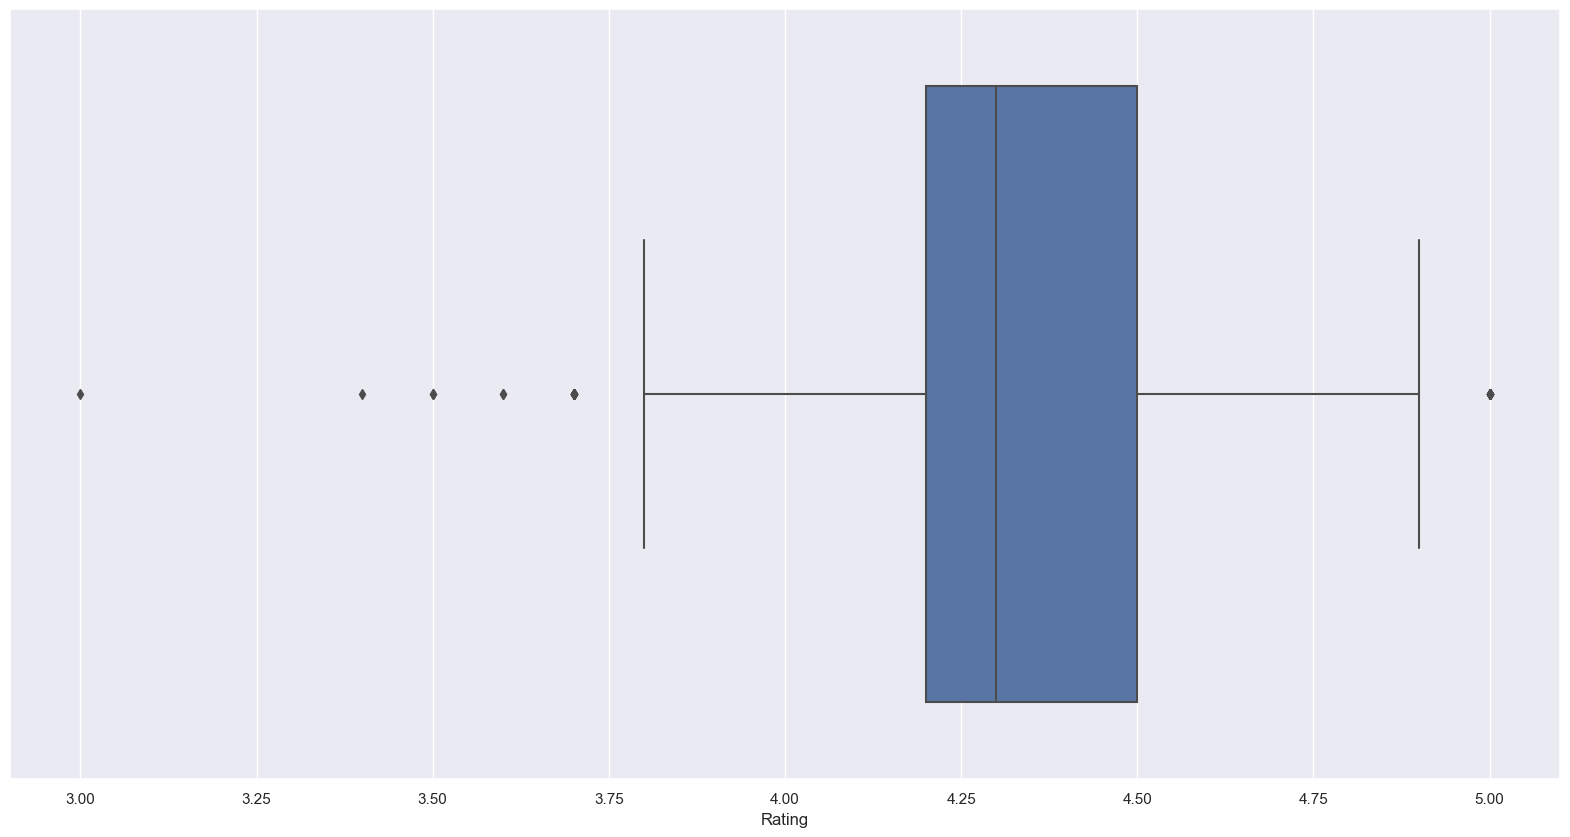

In [879]:
sns.boxplot(x=data.Rating)

In [880]:
np.mean(data["Rating"])

4.321170395869185

In [881]:
data["Rating"].fillna(np.mean(data["Rating"]),inplace=True)

In [882]:
data.isnull().sum()

Product    0
Rating     0
MRP        0
Feature    0
dtype: int64

In [883]:
def extractFeatures(text):
    temp = text.split("Processor ",1) if "Processor:" in text else text.split("Processor",1)
    Processor = temp[0].strip() if len(temp)>1 else "Undefined"
    temp = temp[len(temp)-1].split("Gen)",1)
    Generation = temp[0].strip().replace("(","") if len(temp)>1 else "N/A"
    temp = temp[len(temp)-1].split("GB",1)
    RAM_size = temp[0].strip() if len(temp)>1 else "Undefined"
    RAM_size = RAM_size[len(RAM_size.rstrip('0123456789')):] if RAM_size != "Undefined" else "Undefined"
    temp = temp[len(temp)-1].split("RAM",1)
    RAM_type = temp[0].strip() if len(temp)>1 else "Undefined"
    temp = temp[len(temp)-1].split("bit",1)
    OS_bit_size = temp[0].strip() if len(temp)>1 else "Undefined"
    temp = temp[len(temp)-1].split("Operating System",1)
    OS = temp[0].strip() if len(temp)>1 else "Undefined"
    temp = temp[len(temp)-1].split("HDD",1) if "HDD" in temp[len(temp)-1] else temp[len(temp)-1].split("SSD",1)
    Storage = temp[0].strip() if len(temp)>1 else "Undefined"
    temp = temp[len(temp)-1].split("Display",1)
    Display = temp[0] if len(temp)>1 else "Undefined"
    Touchscreen = "yes" if "Touchscreen" in Display else "no"
    Display = Display.lower().split("(")[1].split("inch")[0]
    return{
    "Processor": Processor,
    "Generation": Generation,
    "RAM_size" : RAM_size,
    "RAM_type" : RAM_type,
    "OS" : OS,
    "Storage" : Storage,
    "Touchscreen" : Touchscreen,
    "Display(inches)" : Display}

In [884]:
data["Feature"].iloc[3],data["Feature"].iloc[100]

('AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64 bit Windows 10 Operating System512 GB SSD39.62 cm (15.6 inch) DisplayHP Documentation, HP e-service, HP BIOS Recovery, HP SSRM, HP Smart, HP Jumpstarts1 Year Onsite Warranty',
 'Intel Core i7 Processor (11th Gen)8 GB DDR4 RAM64 bit Windows 10 Operating System512 GB SSD39.62 cm (15.6 Inch) Display2 Year Carry-In Warranty Term')

In [885]:
data["Feature"].iloc[6],data["Product"].iloc[6]

('Processor: Intel i3-1115G4 (Base- 1.70 GHz & Turbo up to 4.10 GHz) 2 CoresRAM & Storage: 8GB DDR4 & 1TB + 256GB SSDGraphics & Keyboard: Integrated & Standard KeyboardDisplay: 15.6" FHD WVA AG Narrow BorderPorts: 2x USB 3.2 Gen1 ,1x USB 2.0, HDMI 1.4, SD Card reader, Audio jack, 1 M.2 2230/2280 slot for solid-state drive/Intel OptaneIntel Core i3 Processor (11th Gen)8 GB DDR4 RAMWindows 11 Operating System1 TB HDD|256 GB SSD39.62 cm (15.6 inch) Display1 YEAR',
 'DELL Inspiron Core i3 11th Gen - (8 GB/1 TB HDD/256 GB SSD/Windows 11 Home) D560841WIN9S Thin and Ligh...')

In [886]:
temp_list = []
temp_list.append(extractFeatures(data["Feature"][3]))
temp_list.append(extractFeatures(data["Feature"][100]))
temp_data = pd.DataFrame(temp_list,index=[3,100])
temp_data

,Processor,Generation,RAM_size,RAM_type,OS,Storage,Touchscreen,Display(inches)
3,AMD Ryzen 5 Hexa Core,N/A,8,DDR4,Windows 10,512 GB,no,15.6
100,Intel Core i7,11th,8,DDR4,Windows 10,512 GB,no,15.6


In [887]:
data.shape[0]

720

In [898]:
temp_list = []
for i in range(data.shape[0]):
    temp_list.append(extractFeatures(data["Feature"][i]))
    
temp_data = pd.DataFrame(temp_list)
temp_data.head()

,Processor,Generation,RAM_size,RAM_type,OS,Storage,Touchscreen,Display(inches)
0,Intel Core i3,11th,8,DDR4,Windows 11,256 GB,no,14
1,Intel Core i3,11th,8,DDR4,Windows 11,512 GB,no,15.6
2,Intel Core i3,10th,8,DDR4,Windows 11,512 GB,no,15.6
3,AMD Ryzen 5 Hexa Core,N/A,8,DDR4,Windows 10,512 GB,no,15.6
4,Intel Core i5,10th,8,DDR4,Windows 11,512 GB,no,15.6


In [899]:
temp_data["Rating"] = data["Rating"]
temp_data["MRP"] = data["MRP"]

In [900]:
temp_data.head(10)

,Processor,Generation,RAM_size,RAM_type,OS,Storage,Touchscreen,Display(inches),Rating,MRP
0,Intel Core i3,11th,8,DDR4,Windows 11,256 GB,no,14,4.2,"₹36,990"
1,Intel Core i3,11th,8,DDR4,Windows 11,512 GB,no,15.6,4.2,"₹39,990"
2,Intel Core i3,10th,8,DDR4,Windows 11,512 GB,no,15.6,4.3,"₹32,990"
3,AMD Ryzen 5 Hexa Core,N/A,8,DDR4,Windows 10,512 GB,no,15.6,4.4,"₹49,990"
4,Intel Core i5,10th,8,DDR4,Windows 11,512 GB,no,15.6,4.4,"₹49,990"
5,Intel Core i3,11th,8,DDR4,Windows 11,256 GB,no,14,4.2,"₹36,990"
6,"Processor: Intel i3-1115G4 (Base- 1.70 GHz & Turbo up to 4.10 GHz) 2 CoresRAM & Storage: 8GB DDR4 & 1TB + 256GB SSDGraphics & Keyboard: Integrated & Standard KeyboardDisplay: 15.6"" FHD WVA AG Narrow BorderPorts: 2x USB 3.2 Gen1 ,1x USB 2.0, HDMI 1.4, SD Card reader, Audio jack, 1 M.2 2230/2280 slot for solid-state drive/Intel OptaneIntel Core i3",11th,8,DDR4,Windows 11,1 TB,no,15.6,4.3,"₹38,990"
7,Intel Core i5,11th,8,DDR4,Windows 11,512 GB,no,15.6,4.1,"₹39,990"
8,"Stylish & Portable Thin and Light Laptop14 inch 2K QHD, IPS LCD Display ( 400nits peak brightness, 100% sRGB, 3:2 aspect ratio, Full Vision Display)Finger Print Sensor for Faster System AccessLight Laptop without Optical Disk DriveIntel Core i3",11th,8,DDR4,Windows 10,256 GB,no,14,4.4,"₹46,990"
9,AMD Ryzen 7 Quad Core,N/A,16,DDR4,Windows 11,512 GB,no,14,4.1,"₹44,990"


In [901]:
temp_data["Processor"].value_counts().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of Intel Core i5                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      150
Intel Core i3                                                                                                                                                                                                                                                                                                                                                                                                                                                      

In [902]:
temp_data["Processor"] = temp_data["Processor"].replace({"Free upgrade to Windows 11 when available":""},regex=True)
temp_data["Processor"] = temp_data["Processor"].replace({"Pre-installed Genuine Windows 10 Home OS":""},regex=True)
temp_data["Processor"] = temp_data["Processor"].replace({"Stylish \& Portable Thin and Light Laptop14 inch 2K QHD, IPS LCD Display \( 400nits peak brightness, 100\% sRGB, 3:2 aspect ratio, Full Vision Display\)Finger Print Sensor for Faster System AccessLight Laptop without Optical Disk Drive":""},regex=True)
temp_data["Processor"] = temp_data["Processor"].replace({"NVIDIA GeForce RTX 206015\.6 inch Full HD LED Backlit Anti-glare IPS Display, 300 Hz, 300 NitsAlienware Cryo-tech thermal technology to keep the system cool and running at highest performanceTobii-eye tracking to track head pose, presence, fine gaze and eye positionIn-built Alienware Command center software with enhanced control over system settings":""},regex=True)
temp_data["Processor"] = temp_data["Processor"].replace({"NVIDIA RTX 3050 Graphics upto 90W TGP15\.6 inch Full HD AG Display \(250 nits Brightness, 120Hz, Narrow Border\)Alienware Command Center":""},regex=True)
temp_data["Processor"] = temp_data["Processor"].replace({"First Ever ScreenpadNVIDIA GeForce GTX 1050 T":""},regex=True)

temp_data["Processor"] = temp_data["Processor"].replace({"NVIDIA Geforce GTX 1050 Ti for Desktop Level PerformanceOptimized Dolby Audio Premium Sound Enhancement128 GB SSD Capacity for Reduced Boot Up Time and in Game LoadingDual Fan Cooling with Metal AeroBlade for Interuption Free GamingFineTip Backlit Keyboard with Independent Standard Numeric Keypad":""},regex=True)
temp_data["Processor"] = temp_data["Processor"].replace({"15\.6 inches Full HD IPS Thin Bezel Display \(144Hz, 45\% NTSC Color Gamut\)":""},regex=True)
temp_data["Processor"] = temp_data["Processor"].replace({"NVIDIA GeForce GTX 1660 Ti15.6 inch Full HD LED Backlit Anti-glare IPS Display, 300 Hz, 300 NitsAlienware Cryo-tech thermal technology to keep the system cool and running at highest performanceTobii-eye tracking to track head pose, presence, fine gaze and eye positionIn-built Alienware Command center software with enhanced control over system settings":""},regex=True)

temp_data["Processor"] = temp_data["Processor"].replace({"NVIDIA GeForce RTX 2080 with Max-Q15\.6 inch Full HD LED Backlit Anti-glare IPS Display, 300 Hz, 300 NitsAlienware Cryo-tech thermal technology to keep the system cool and running at highest performanceTobii-eye tracking to track head pose, presence, fine gaze and eye positionIn-built Alienware Command center software with enhanced control over system settings":""},regex=True)
temp_data["Processor"] = temp_data["Processor"].replace({"NVIDIA RTX 3050 Graphics upto 90W TGP15\.6 inch Full HD AG Display \(250 nits Brightness, 120Hz, Narrow Border\)Alienware Command Center":""},regex=True)
temp_data["Processor"] = temp_data["Processor"].replace({"Pre-installed Genuine Windows 10 Operating System \(Includes Built-in Security, Free Automated Updates, Latest Features\)Dual Fan Cooling with Metal AeroBlade 3D128 GB SSD for Reduced Boot Up Time and in Game LoadingUpgradable SSD Upto 512 GB and RAM Upto 32 GBNVIDIA Geforce GTX 1050Ti for Desktop Level Performance":""},regex=True)
temp_data["Processor"] = temp_data["Processor"].replace({"15.6 inches Full HD IPS Thin Bezel Display \(60Hz, 45% NTSC Color Gamut\)":""},regex=True)


In [903]:
temp_data["Processor"] = temp_data["Processor"].replace({"Powered by 11th Gen ":""},regex=True)
temp_data["Processor"] = temp_data["Processor"].replace({"iIntel Core i7":"Intel Core i7"},regex=False)
temp_data["Processor"] = temp_data["Processor"].replace({"Intel Evo Core i5 ProcessorMicrosoft Office 2019 Home \& Student IncludedStylish Thin and Light Laptop without Optical Disk Drive":""},regex=True)
temp_data["Processor"] = temp_data["Processor"].replace({"Processor: Intel i3-1115G4 \(Base- 1.70 GHz & Turbo up to 4.10 GHz\) 2 CoresRAM \& Storage: 8GB DDR4 \& 1TB \+ 256GB SSDGraphics \& Keyboard: Integrated \& Standard KeyboardDisplay: 15.6\" FHD WVA AG Narrow BorderPorts: 2x USB 3\.2 Gen1 ,1x USB 2\.0, HDMI 1.4, SD Card reader, Audio jack, 1 M\.2 2230/2280 slot for solid-state drive/Intel Optane":""},regex=True)
temp_data["Processor"] = temp_data["Processor"].replace({"Processor: 11th Generation Intel Core i5-1135G7":"Intel Core i5"},regex=False)
temp_data["Processor"] = temp_data["Processor"].replace({"Processor: 10th Generation Intel Core i3-1005G1":"Intel Core i3"},regex=False)
temp_data["Processor"] = temp_data["Processor"].replace({"Processor: Intel i7-11800H- (2.30 GHz up to 4.60 GHz) 16MB L3RAM & Storage: 16GB DDR4 (2 DIMM Slots) & 512GB SSDGraphics: NVIDIA� GEFORCE� RTX 3050 Ti (4GB GDDR6)Display: 15.6\" FHD WVA AG 250 nits 120Hz Narrow Border, Backlit Keyboard OrangeColor: Dark Shadow GreyPorts: 1. HiSpeed USB 2.0 | 2. HiSpeed USB 2.0 with PowerShare | 3. USB 3.2 Gen 1 Type-C port with DisplayPort with alt mode | 4. SuperSpeed USB 3.2 | 5. HDMI | 6. Power in | 7. RJ45 | 8. Headphones/micIntel Core i7":"Intel Core i7"},regex=False)
temp_data["Processor"] = temp_data["Processor"].replace({"Processor: Intel i3-1125G4 \(2\.00 GHz up to 3\.70 GHz\)RAM \& Storage\: 8GB DDR4 \(2 DIMM Slots\) \& 256GB SSDSoftware: Win 11 \+ Office H\&S 2021Display: 14\.0\" FHD WVA Truelife Touch Narrow Border 60HzPorts: \"1 HDMI out 1\.4a, 2 USB 3\.2 Gen 1 Type-A, 1 USB 3\.2 Gen 2 Type-C with Power Delivery and Video, 1 DC-in port, 1 3\.5mm Headphone/Microphone combination jack\"WiFi \& BT: Intel Wi-Fi 6 2x2 \(Gig\+\) and Bluetooth 5\.1":""},regex=True)




In [904]:
temp_data["Processor"].value_counts().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of Intel Core i5                   157
Intel Core i3                   135
AMD Ryzen 9 Octa Core            87
AMD Ryzen 7 Octa Core            80
Intel Core i7                    56
AMD Ryzen 5 Hexa Core            51
AMD Ryzen 3 Dual Core            42
AMD Ryzen 5 Quad Core            37
Intel Celeron Dual Core          20
Intel Core i9                    11
Apple M1                          7
Apple M1 Pro                      6
Apple M2                          5
AMD Ryzen 3 Quad Core             4
Undefined                         4
Intel Celeron Quad Core           3
Intel Pentium Quad Core           3
Intel Evo Core i5                 2
AMD Athlon Dual Core              2
Intel Pentium Silver              2
Qualcomm Snapdragon 7c Gen 2      1
Apple M1 Max                      1
AMD Ryzen 7 Quad Core             1
AMD Ryzen 5 Dual Core             1
AMD Dual Core                     1
AMD Ryzen 3 Hexa Core             1
Na

In [905]:
temp_data[temp_data["Processor"]=="Qualcomm Snapdragon 7c Gen 2"]

,Processor,Generation,RAM_size,RAM_type,OS,Storage,Touchscreen,Display(inches),Rating,MRP
83,Qualcomm Snapdragon 7c Gen 2,N/A,4,LPDDR4X,Windows 11,Undefined,no,14,4.4,"₹32,990"


In [906]:
temp_data.drop(labels=["Generation"],inplace=True,axis=1)

In [907]:
temp_data.columns

Index(['Processor', 'RAM_size', 'RAM_type', 'OS', 'Storage', 'Touchscreen',
       'Display(inches)', 'Rating', 'MRP'],
      dtype='object')

In [909]:
temp_data["RAM_size"].value_counts()

8     403
16    263
4      37
32     17
Name: RAM_size, dtype: int64

In [910]:
temp_data["RAM_type"] = temp_data["RAM_type"].apply(lambda x : "DDR" if "DDR" in x else x)

In [911]:
temp_data["RAM_type"].value_counts()

DDR               708
Unified Memory     12
Name: RAM_type, dtype: int64

In [912]:
index_temp = temp_data.index[temp_data["RAM_type"] =="Unified Memory"].values

data.iloc[index_temp]

,Product,Rating,MRP,Feature
64,APPLE 2022 MacBook Pro M2 - (8 GB/512 GB SSD/Mac OS Monterey) MNEQ3HN/A,4.7,"₹1,39,990","Apple M2 Processor8 GB Unified Memory RAMMac OS Operating System512 GB SSD33.78 cm (13.3 Inch) DisplayBuilt-in Apps: iMovie, Siri, GarageBand, Pages, Numbers, Photos, Keynote, Safari, Mail, FaceTime, Messages, Maps, Stocks, Home, Voice Memos, Notes, Calendar, Contacts, Reminders, Photo Booth, Preview, Books, App Store, Time Machine, TV, Music, Podcasts, Find My, QuickTime Player1 Year Limited Warranty"
79,APPLE 2021 Macbook Pro M1 Pro - (16 GB/512 GB SSD/Mac OS Monterey) MKGP3HN/A,4.8,"₹1,81,990","Apple M1 Pro Processor16 GB Unified Memory RAMMac OS Operating System512 GB SSD36.07 cm (14.2 inch) DisplayiMovie, Siri, GarageBand, Pages, Numbers, Photos, Keynote, Safari, Mail, FaceTime, Messages, Maps, Stocks, Home, Voice Memos, Notes, Calendar, Contacts, Reminders, Photo Booth, Preview, Books, App Store, Time Machine, TV, Music, Podcasts, Find My, QuickTime Player1 Year Limited Warranty"
85,APPLE 2022 MacBook AIR M2 - (8 GB/512 GB SSD/Mac OS Monterey) MLY23HN/A,5.0,"₹1,39,990","Apple M2 Processor8 GB Unified Memory RAMMac OS Operating System512 GB SSD34.54 cm (13.6 Inch) DisplayBuilt-in Apps: iMovie, Siri, GarageBand, Pages, Numbers, Photos, Keynote, Safari, Mail, FaceTime, Messages, Maps, Stocks, Home, Voice Memos, Notes, Calendar, Contacts, Reminders, Photo Booth, Preview, Books, App Store, Time Machine, TV, Music, Podcasts, Find My, QuickTime Player1 Year Limited Warranty"
153,APPLE 2021 Macbook Pro M1 Pro - (16 GB/1 TB SSD/Mac OS Monterey) MK193HN/A,4.8,"₹2,41,990","Apple M1 Pro Processor16 GB Unified Memory RAMMac OS Operating System1 TB SSD41.15 cm (16.2 inch) DisplayiMovie, Siri, GarageBand, Pages, Numbers, Photos, Keynote, Safari, Mail, FaceTime, Messages, Maps, Stocks, Home, Voice Memos, Notes, Calendar, Contacts, Reminders, Photo Booth, Preview, Books, App Store, Time Machine, TV, Music, Podcasts, Find My, QuickTime Player1 Year Limited Warranty"
162,APPLE 2021 Macbook Pro M1 Max - (32 GB/1 TB SSD/Mac OS Monterey) MK1A3HN/A,4.3,"₹3,09,490","Apple M1 Max Processor32 GB Unified Memory RAMMac OS Operating System1 TB SSD41.15 cm (16.2 inch) DisplayiMovie, Siri, GarageBand, Pages, Numbers, Photos, Keynote, Safari, Mail, FaceTime, Messages, Maps, Stocks, Home, Voice Memos, Notes, Calendar, Contacts, Reminders, Photo Booth, Preview, Books, App Store, Time Machine, TV, Music, Podcasts, Find My, QuickTime Player1 Year Limited Warranty"
168,APPLE 2021 Macbook Pro M1 Pro - (16 GB/1 TB SSD/Mac OS Monterey) MKGQ3HN/A,4.8,"₹2,22,990","Apple M1 Pro Processor16 GB Unified Memory RAMMac OS Operating System1 TB SSD36.07 cm (14.2 inch) DisplayiMovie, Siri, GarageBand, Pages, Numbers, Photos, Keynote, Safari, Mail, FaceTime, Messages, Maps, Stocks, Home, Voice Memos, Notes, Calendar, Contacts, Reminders, Photo Booth, Preview, Books, App Store, Time Machine, TV, Music, Podcasts, Find My, QuickTime Player1 Year Limited Warranty"
209,APPLE 2021 Macbook Pro M1 Pro - (16 GB/512 GB SSD/Mac OS Monterey) MK183HN/A,4.8,"₹2,22,990","Apple M1 Pro Processor16 GB Unified Memory RAMMac OS Operating System512 GB SSD41.15 cm (16.2 inch) DisplayiMovie, Siri, GarageBand, Pages, Numbers, Photos, Keynote, Safari, Mail, FaceTime, Messages, Maps, Stocks, Home, Voice Memos, Notes, Calendar, Contacts, Reminders, Photo Booth, Preview, Books, App Store, Time Machine, TV, Music, Podcasts, Find My, QuickTime Player1 Year Limited Warranty"
233,APPLE 2022 MacBook Pro M2 - (8 GB/256 GB SSD/Mac OS Monterey) MNEP3HN/A,4.6,"₹1,21,990","Apple M2 Processor8 GB Unified Memory RAMMac OS Operating System256 GB SSD33.78 cm (13.3 Inch) DisplayBuilt-in Apps: iMovie, Siri, GarageBand, Pages, Numbers, Photos, Keynote, Safari, Mail, FaceTime, Messages, Maps, Stocks, Home, Voice Memos, Notes, Calendar, Contacts, Reminders, Photo Booth, Preview, Books, App Store, Time Machine, TV, Music, Podcasts, Find My, QuickTime Player1 Year Limited Warranty"
282,APPLE 2022 MacBo

In [913]:
temp_data["OS"].value_counts()

Windows 11    561
Windows 10    129
Mac OS         19
Chrome          7
DOS             4
Name: OS, dtype: int64

In [914]:
temp_data["Storage"].value_counts()

512 GB       375
1 TB         223
256 GB        99
Undefined     10
2 TB           7
128 GB         6
Name: Storage, dtype: int64

In [915]:
data.iloc[temp_data.index[temp_data["Storage"]=="Undefined"].values]

,Product,Rating,MRP,Feature
83,SAMSUNG Galaxy Book Go Snapdragon 7c Gen 2 - (4 GB/128 GB EMMC Storage/Windows 11 Home) NP340XLA-KA1IN...,4.40000,"₹32,990",Qualcomm Snapdragon 7c Gen 2 Processor4 GB LPDDR4X RAMWindows 11 Operating System35.56 cm (14 Inch) DisplayOffice Home and Student 20211 Year Onsite Warranty
89,Lenovo IdeaPad 3 CB Celeron Dual Core - (4 GB/64 GB EMMC Storage/Chrome OS) 14IGL05 Thin and Light Lap...,4.32117,"₹19,490",Intel Celeron Dual Core Processor4 GB DDR4 RAMChrome Operating System35.56 cm (14 Inch) Display1 Year Carry-in Warranty
96,Lenovo IdeaPad 3 CB Celeron Dual Core - (4 GB/64 GB EMMC Storage/Chrome OS) 14IGL05 Thin and Light Lap...,4.32117,"₹19,490",Intel Celeron Dual Core Processor4 GB DDR4 RAMChrome Operating System35.56 cm (14 Inch) Display1 Year Carry-in Warranty
345,ASUS Chromebook Flip Touch Celeron Dual Core - (4 GB/32 GB EMMC Storage/Chrome OS) C214MA-BU0704 Chrom...,4.00000,"₹14,990",Intel Celeron Dual Core Processor4 GB LPDDR4 RAMChrome Operating System29.46 cm (11.6 inch) Touchscreen Display1 Year Onsite Warranty
509,ASUS Chromebook Flip Touch Celeron Dual Core - (4 GB/64 GB EMMC Storage/Chrome OS) C523NA-A20303 Chrom...,4.00000,"₹24,390",Intel Celeron Dual Core Processor4 GB LPDDR4 RAMChrome Operating System39.62 cm (15.6 inch) Touchscreen Display1 Year Onsite Warranty
544,ASUS EeeBook 12 Celeron Dual Core - (4 GB/64 GB EMMC Storage/Windows 11 Home) E210MA-GJ011W Thin and L...,4.50000,"₹21,990",Intel Celeron Dual Core Processor4 GB DDR4 RAM64 bit Windows 11 Operating System29.46 cm (11.6 Inch) Display1 Year Onsite warranty
559,ASUS EeeBook 12 Celeron Dual Core - (4 GB/64 GB EMMC Storage/Windows 11 Home) E210MA-GJ012W Thin and L...,4.00000,"₹19,990",Intel Celeron Dual Core Processor4 GB DDR4 RAM64 bit Windows 11 Operating System29.46 cm (11.6 Inch) Display1 Year Onsite warranty
632,Lenovo IdeaPad Flex 3 Chromebook Celeron Dual Core - (4 GB/128 GB EMMC Storage/Chrome OS) CB 11IJL6 Ch...,3.60000,"₹28,490",Intel Celeron Dual Core Processor4 GB LPDDR4X RAM64 bit Chrome Operating System29.46 cm (11.6 inch) Touchscreen Display1 Year Onsite�Warranty
695,ASUS Chromebook Celeron Dual Core - (4 GB/64 GB EMMC Storage/Chrome OS) C423NA-EC0521 Chromebook,4.10000,"₹25,990",Intel Celeron Dual Core Processor4 GB LPDDR4 RAMChrome Operating System35.56 cm (14 inch) Touchscreen Display1 Year Onsite Warranty
715,ASUS Chromebook Flip Touch Celeron Dual Core - (4 GB/64 GB EMMC Storage/Chrome OS) C214MA-BU0452 Chrom...,4.00000,"₹23,490",Intel Celeron Dual Core Processor4 GB LPDDR4 RAMChrome Operating System29.46 cm (11.6 inch) Touchscreen Display1 Year Onsite Warranty


In [916]:
print(data.iloc[83])

Product                                                        SAMSUNG Galaxy Book Go Snapdragon 7c Gen 2 - (4 GB/128 GB EMMC Storage/Windows 11 Home) NP340XLA-KA1IN...
Rating                                                                                                                                                               4.4
MRP                                                                                                                                                              ₹32,990
Feature    Qualcomm Snapdragon 7c Gen 2 Processor4 GB LPDDR4X RAMWindows 11 Operating System35.56 cm (14 Inch) DisplayOffice Home and Student 20211 Year Onsite Warranty
Name: 83, dtype: object


In [917]:
temp_data["Display(inches)"].value_counts()

15.6       492
14         137
13.3        18
16          16
17.3        11
11.6         9
16.1         8
13.4         5
16.2         5
14.1         4
15           4
13.6         3
35 cm)       2
14.2         2
13           1
14.96        1
13.5         1
16.6         1
Name: Display(inches), dtype: int64

In [918]:
temp_data["Display(inches)"] = temp_data["Display(inches)"].replace({"35 cm\)":"13.8"},regex=True)

In [919]:
temp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Processor        720 non-null    object 
 1   RAM_size         720 non-null    object 
 2   RAM_type         720 non-null    object 
 3   OS               720 non-null    object 
 4   Storage          720 non-null    object 
 5   Touchscreen      720 non-null    object 
 6   Display(inches)  720 non-null    object 
 7   Rating           720 non-null    float64
 8   MRP              720 non-null    object 
dtypes: float64(1), object(8)
memory usage: 50.8+ KB


In [920]:
temp_data["MRP"] = temp_data["MRP"].replace({",":""},regex=True)
temp_data["MRP"] = temp_data["MRP"].replace({"₹":""},regex=True)

In [921]:
temp_data.head()

,Processor,RAM_size,RAM_type,OS,Storage,Touchscreen,Display(inches),Rating,MRP
0,Intel Core i3,8,DDR,Windows 11,256 GB,no,14,4.2,36990
1,Intel Core i3,8,DDR,Windows 11,512 GB,no,15.6,4.2,39990
2,Intel Core i3,8,DDR,Windows 11,512 GB,no,15.6,4.3,32990
3,AMD Ryzen 5 Hexa Core,8,DDR,Windows 10,512 GB,no,15.6,4.4,49990
4,Intel Core i5,8,DDR,Windows 11,512 GB,no,15.6,4.4,49990


In [922]:
temp_data["MRP"] = temp_data["MRP"].astype("int64")

In [923]:
temp_data["RAM_size"] = temp_data["RAM_size"].astype("int64")

In [693]:
temp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Processor        720 non-null    object 
 1   Generation       720 non-null    object 
 2   RAM_size         720 non-null    int64  
 3   RAM_type         720 non-null    object 
 4   OS               720 non-null    object 
 5   Storage          720 non-null    object 
 6   Touchscreen      720 non-null    object 
 7   Display(inches)  720 non-null    object 
 8   Rating           720 non-null    float64
 9   MRP              720 non-null    int64  
 10  Brand            720 non-null    object 
dtypes: float64(1), int64(2), object(8)
memory usage: 62.0+ KB


In [924]:
temp_data.to_csv("data/laptop_details_cleaned.csv",index=False)

## data Analysis

In [925]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [926]:
data = pd.read_csv("data/laptop_details_cleaned.csv")

<AxesSubplot:xlabel='MRP', ylabel='Count'>

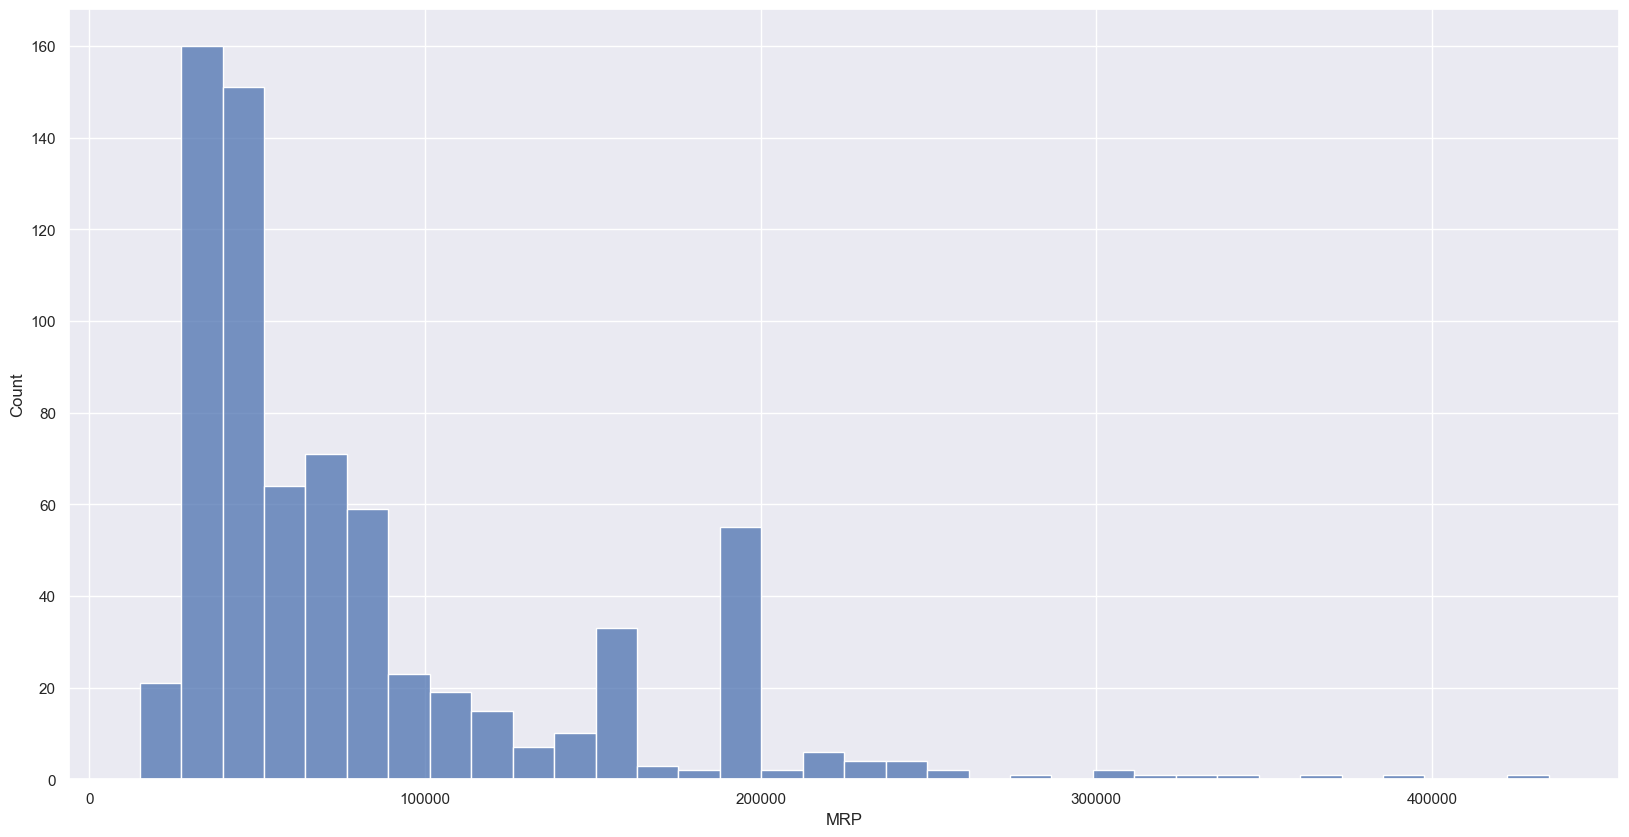

In [927]:
sns.histplot(data=data,x=data["MRP"])

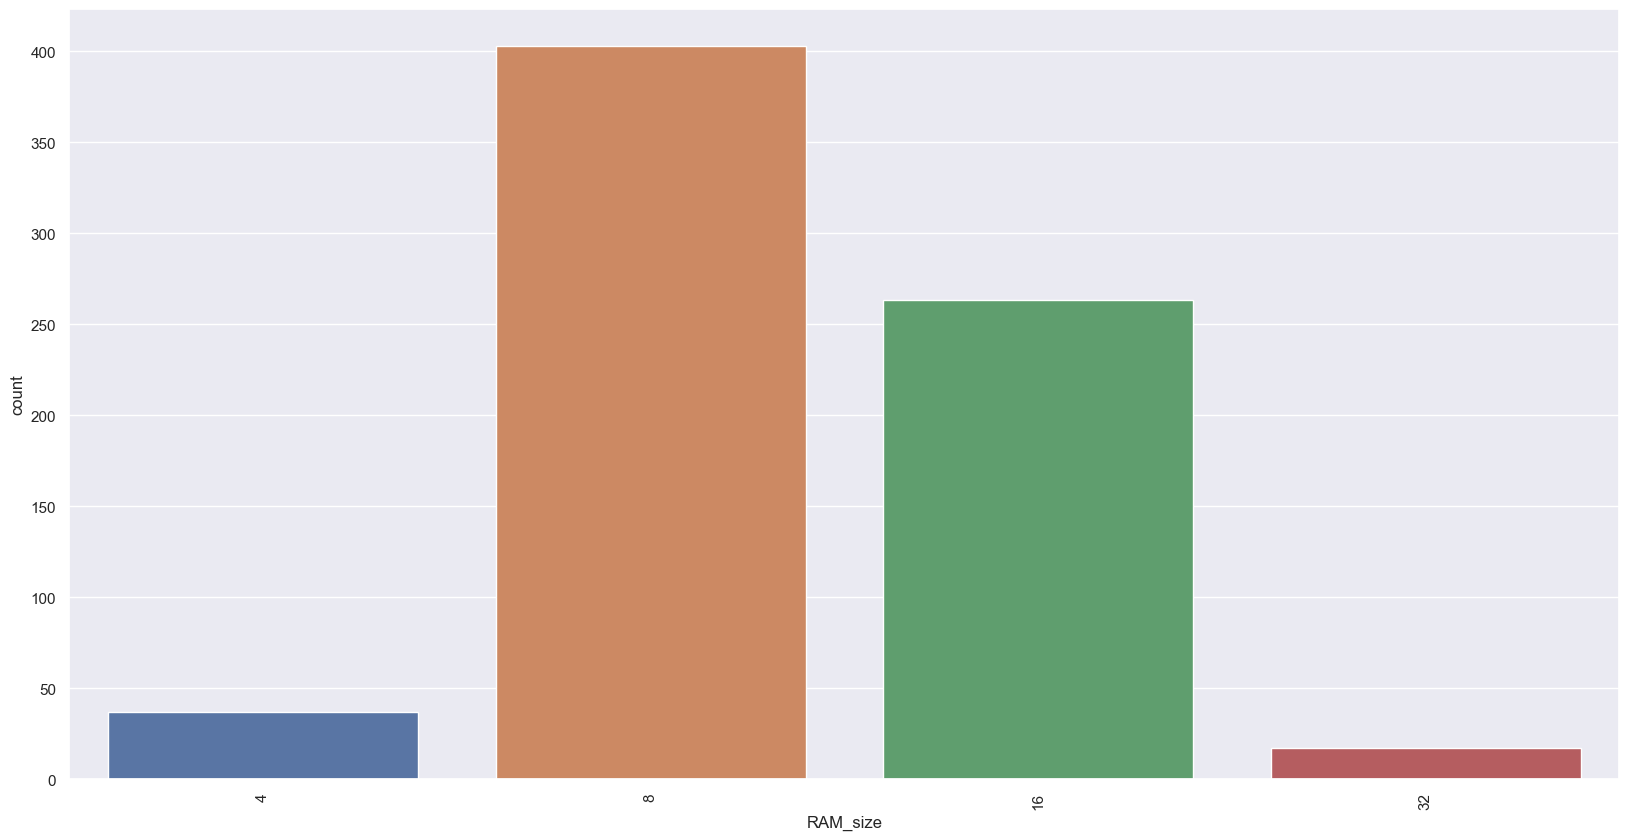

In [928]:
fig = sns.countplot(data=data,x=data.RAM_size)

fig.set_xticklabels(fig.get_xticklabels(), rotation = 90, ha="center")

sns.set(rc={'figure.figsize':(20,10)})

In [930]:
px.box(data.Rating)

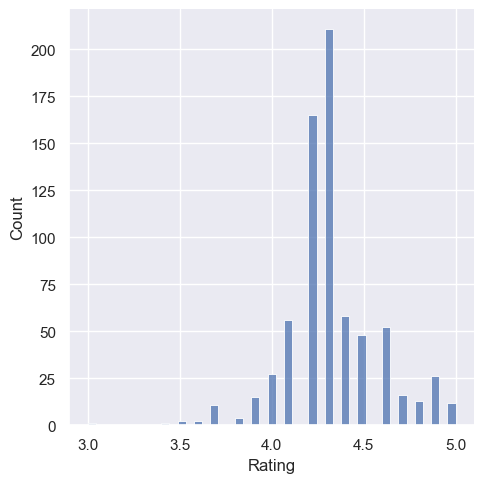

In [931]:
sns.displot(data.Rating)

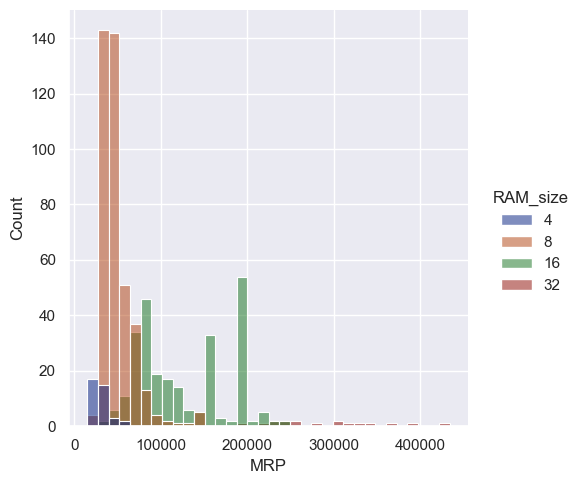

In [933]:
sns.displot(data=data,x="MRP",hue="RAM_size",palette = 'dark')
sns.set(rc={'figure.figsize':(10,10)})
sns.set_style(style='white')

In [934]:
fig = px.bar(data, x="Processor", y="Display(inches)", color="MRP", barmode="group")
fig.show()

In [740]:
data.columns

Index(['Processor', 'Generation', 'RAM_size', 'RAM_type', 'OS', 'Storage',
       'Touchscreen', 'Display(inches)', 'Rating', 'MRP', 'Brand'],
      dtype='object')

In [935]:
px.scatter(data, x="OS", y="MRP",
           size="Display(inches)", color="Storage",
                 hover_name="Touchscreen")

In [937]:
fig = px.bar(data, y="RAM_type", x="OS", color="Rating", barmode="group")
fig.show()

## Data Preprocessing for Vectorization

In [938]:
data.tail()

,Processor,RAM_size,RAM_type,OS,Storage,Touchscreen,Display(inches),Rating,MRP
715,Intel Celeron Dual Core,4,DDR,Chrome,Undefined,yes,11.6,4.00000,23490
716,AMD Ryzen 7 Octa Core,8,DDR,Windows 11,512 GB,no,15.6,4.50000,73490
717,AMD Ryzen 9 Octa Core,16,DDR,Windows 11,1 TB,no,15.6,4.32117,194990
718,Intel Core i7,16,DDR,Windows 11,512 GB,yes,14.0,3.00000,125990
719,Intel Core i5,8,DDR,Windows 10,1 TB,no,15.6,4.20000,50990


In [939]:
data.Storage.value_counts()

512 GB       375
1 TB         223
256 GB        99
Undefined     10
2 TB           7
128 GB         6
Name: Storage, dtype: int64

In [940]:
data["Processor"].value_counts()

Intel Core i5                   157
Intel Core i3                   135
AMD Ryzen 9 Octa Core            87
AMD Ryzen 7 Octa Core            80
Intel Core i7                    56
AMD Ryzen 5 Hexa Core            51
AMD Ryzen 3 Dual Core            42
AMD Ryzen 5 Quad Core            37
Intel Celeron Dual Core          20
Intel Core i9                    11
Apple M1                          7
Apple M1 Pro                      6
Apple M2                          5
AMD Ryzen 3 Quad Core             4
Undefined                         4
Intel Celeron Quad Core           3
Intel Pentium Quad Core           3
Intel Evo Core i5                 2
AMD Athlon Dual Core              2
Intel Pentium Silver              2
Qualcomm Snapdragon 7c Gen 2      1
Apple M1 Max                      1
AMD Ryzen 7 Quad Core             1
AMD Ryzen 5 Dual Core             1
AMD Dual Core                     1
AMD Ryzen 3 Hexa Core             1
Name: Processor, dtype: int64

In [941]:
temp_data.Processor.value_counts()

Intel Core i5                   157
Intel Core i3                   135
AMD Ryzen 9 Octa Core            87
AMD Ryzen 7 Octa Core            80
Intel Core i7                    56
AMD Ryzen 5 Hexa Core            51
AMD Ryzen 3 Dual Core            42
AMD Ryzen 5 Quad Core            37
Intel Celeron Dual Core          20
Intel Core i9                    11
Apple M1                          7
Apple M1 Pro                      6
Apple M2                          5
AMD Ryzen 3 Quad Core             4
Undefined                         4
Intel Celeron Quad Core           3
Intel Pentium Quad Core           3
Intel Evo Core i5                 2
AMD Athlon Dual Core              2
Intel Pentium Silver              2
Qualcomm Snapdragon 7c Gen 2      1
Apple M1 Max                      1
AMD Ryzen 7 Quad Core             1
AMD Ryzen 5 Dual Core             1
AMD Dual Core                     1
AMD Ryzen 3 Hexa Core             1
Name: Processor, dtype: int64

In [942]:
data.Storage.value_counts()

512 GB       375
1 TB         223
256 GB        99
Undefined     10
2 TB           7
128 GB         6
Name: Storage, dtype: int64

In [943]:
data.iloc[data.index[data.Storage == "Undefined"].values]

,Processor,RAM_size,RAM_type,OS,Storage,Touchscreen,Display(inches),Rating,MRP
83,Qualcomm Snapdragon 7c Gen 2,4,DDR,Windows 11,Undefined,no,14.0,4.40000,32990
89,Intel Celeron Dual Core,4,DDR,Chrome,Undefined,no,14.0,4.32117,19490
96,Intel Celeron Dual Core,4,DDR,Chrome,Undefined,no,14.0,4.32117,19490
345,Intel Celeron Dual Core,4,DDR,Chrome,Undefined,yes,11.6,4.00000,14990
509,Intel Celeron Dual Core,4,DDR,Chrome,Undefined,yes,15.6,4.00000,24390
544,Intel Celeron Dual Core,4,DDR,Windows 11,Undefined,no,11.6,4.50000,21990
559,Intel Celeron Dual Core,4,DDR,Windows 11,Undefined,no,11.6,4.00000,19990
632,Intel Celeron Dual Core,4,DDR,Chrome,Undefined,yes,11.6,3.60000,28490
695,Intel Celeron Dual Core,4,DDR,Chrome,Undefined,yes,14.0,4.10000,25990
715,Intel Celeron Dual Core,4,DDR,Chrome,Undefined,yes,11.6,4.00000,23490


In [944]:
def Storage_scaling(x):
    if("GB" in x):
        x = x.replace("GB","").strip()
    elif("TB" in x):
        x = x.replace("TB","").strip()
        x=int(x)*1024
    else:
        x = 256
    return x

In [945]:
data["Storage"] = data["Storage"].apply(lambda x : Storage_scaling(x))

In [946]:
data.Storage.value_counts()

512     375
1024    223
256      99
256      10
2048      7
128       6
Name: Storage, dtype: int64

In [947]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Processor        720 non-null    object 
 1   RAM_size         720 non-null    int64  
 2   RAM_type         720 non-null    object 
 3   OS               720 non-null    object 
 4   Storage          720 non-null    object 
 5   Touchscreen      720 non-null    object 
 6   Display(inches)  720 non-null    float64
 7   Rating           720 non-null    float64
 8   MRP              720 non-null    int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 50.8+ KB


In [948]:
data["Storage"] = data["Storage"].astype("int64")

In [949]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Processor        720 non-null    object 
 1   RAM_size         720 non-null    int64  
 2   RAM_type         720 non-null    object 
 3   OS               720 non-null    object 
 4   Storage          720 non-null    int64  
 5   Touchscreen      720 non-null    object 
 6   Display(inches)  720 non-null    float64
 7   Rating           720 non-null    float64
 8   MRP              720 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 50.8+ KB


In [950]:
data.head()

,Processor,RAM_size,RAM_type,OS,Storage,Touchscreen,Display(inches),Rating,MRP
0,Intel Core i3,8,DDR,Windows 11,256,no,14.0,4.2,36990
1,Intel Core i3,8,DDR,Windows 11,512,no,15.6,4.2,39990
2,Intel Core i3,8,DDR,Windows 11,512,no,15.6,4.3,32990
3,AMD Ryzen 5 Hexa Core,8,DDR,Windows 10,512,no,15.6,4.4,49990
4,Intel Core i5,8,DDR,Windows 11,512,no,15.6,4.4,49990


In [953]:
data.to_csv("data/laptop_details_PreProcessed.csv",index=False)

In [6]:
data = pd.read_csv("data/laptop_details_PreProcessed.csv")

In [8]:
data.MRP.describe()

count       720.000000
mean      81605.837500
std       61552.955102
min       14990.000000
25%       38996.750000
50%       59990.000000
75%       95240.000000
max      434830.000000
Name: MRP, dtype: float64

## Data Vectorization

In [952]:
data = data.drop(["Touchscreen"],axis=1)


In [993]:
data.Processor[data["Processor"]=="Apple M1"].value_counts()

Apple M1    7
Name: Processor, dtype: int64

In [954]:
## splitting to input and target

y = data['MRP']

x = data.drop('MRP',axis=1)

print(x.columns, y)

Index(['Processor', 'RAM_size', 'RAM_type', 'OS', 'Storage', 'Display(inches)',
       'Rating'],
      dtype='object') 0       36990
1       39990
2       32990
3       49990
4       49990
        ...  
715     23490
716     73490
717    194990
718    125990
719     50990
Name: MRP, Length: 720, dtype: int64


In [955]:
import sklearn
# split into train and test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=100)

In [867]:
print(X_train.shape, y_train.shape)

print(X_test.shape, y_test.shape)

X_test.head()

(540, 7) (540,)
(180, 7) (180,)


,Processor,RAM_size,RAM_type,OS,Storage,Display(inches),Rating
198,AMD,8,DDR,Windows 10,512,15.6,4.4
487,AMD,8,DDR,Windows 11,512,15.6,4.2
365,AMD,16,DDR,Windows 11,1024,16.1,3.5
620,AMD,8,DDR,Windows 11,512,15.6,4.5
636,AMD,8,DDR,Windows 11,512,15.6,4.2


## Separating Categorical and Numerical Columns:

In [956]:
X_train_cat = X_train.select_dtypes(include=['object'])

X_train_num = X_train.select_dtypes(include=['int64','float64'])

In [957]:
X_train_cat.columns

Index(['Processor', 'RAM_type', 'OS'], dtype='object')

In [958]:
X_train_num.columns

Index(['RAM_size', 'Storage', 'Display(inches)', 'Rating'], dtype='object')

## Scaling the Numerical Features

In [959]:
X_train_num.head()

,RAM_size,Storage,Display(inches),Rating
481,8,512,15.6,4.10000
205,8,512,15.6,4.32117
248,16,512,13.3,4.32117
211,16,1024,15.6,4.90000
693,8,512,14.0,4.32117


In [960]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()

X_train_num_rescaled = pd.DataFrame(std_scaler.fit_transform(X_train_num), 
                                    columns = X_train_num.columns, 
                                    index = X_train_num.index)

X_train_num_rescaled.head()

,RAM_size,Storage,Display(inches),Rating
481,-0.604633,-0.415012,0.476404,-0.855992
205,-0.604633,-0.415012,0.476404,0.003053
248,0.889655,-0.415012,-2.129716,0.003053
211,0.889655,1.177218,0.476404,2.251277
693,-0.604633,-0.415012,-1.336549,0.003053


### Categorical Columns -- identification of nomial and ordinal features

In [961]:
X_train_cat.head()

,Processor,RAM_type,OS
481,Intel Core i5,DDR,Windows 11
205,Intel Core i3,DDR,Windows 11
248,Intel Core i7,DDR,Windows 11
211,AMD Ryzen 9 Octa Core,DDR,Windows 11
693,AMD Ryzen 5 Hexa Core,DDR,Windows 11


In [962]:
from sklearn.preprocessing import OneHotEncoder

encoder_ = OneHotEncoder(drop='first',sparse=False)

# column names are (annoyingly) lost after OneHotEncoding
# (i.e. the dataframe is converted to a numpy ndarray)

X_train_cat = pd.DataFrame(encoder_.fit_transform(X_train_cat), 
                               columns=encoder_.get_feature_names_out(X_train_cat.columns), 
                               index = X_train_cat.index)

X_train_cat.head()

,Processor_AMD Dual Core,Processor_AMD Ryzen 3 Dual Core,Processor_AMD Ryzen 3 Hexa Core,Processor_AMD Ryzen 3 Quad Core,Processor_AMD Ryzen 5 Dual Core,Processor_AMD Ryzen 5 Hexa Core,Processor_AMD Ryzen 5 Quad Core,Processor_AMD Ryzen 7 Octa Core,Processor_AMD Ryzen 7 Quad Core,Processor_AMD Ryzen 9 Octa Core,...,Processor_Intel Evo Core i5,Processor_Intel Pentium Quad Core,Processor_Intel Pentium Silver,Processor_Qualcomm Snapdragon 7c Gen 2,Processor_Undefined,RAM_type_Unified Memory,OS_DOS,OS_Mac OS,OS_Windows 10,OS_Windows 11
481,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
205,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
248,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
211,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
693,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## concating all numerical and categorial transformed test data features

In [963]:
X_train_transformed = pd.concat([X_train_num_rescaled,X_train_cat],axis=1)
X_train_transformed.head()

,RAM_size,Storage,Display(inches),Rating,Processor_AMD Dual Core,Processor_AMD Ryzen 3 Dual Core,Processor_AMD Ryzen 3 Hexa Core,Processor_AMD Ryzen 3 Quad Core,Processor_AMD Ryzen 5 Dual Core,Processor_AMD Ryzen 5 Hexa Core,...,Processor_Intel Evo Core i5,Processor_Intel Pentium Quad Core,Processor_Intel Pentium Silver,Processor_Qualcomm Snapdragon 7c Gen 2,Processor_Undefined,RAM_type_Unified Memory,OS_DOS,OS_Mac OS,OS_Windows 10,OS_Windows 11
481,-0.604633,-0.415012,0.476404,-0.855992,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
205,-0.604633,-0.415012,0.476404,0.003053,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
248,0.889655,-0.415012,-2.129716,0.003053,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
211,0.889655,1.177218,0.476404,2.251277,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
693,-0.604633,-0.415012,-1.336549,0.003053,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## Vectorization of test data

In [964]:
X_test_cat = X_test.select_dtypes(include=['object'])

X_test_num = X_test.select_dtypes(include=['int64','float64'])

In [965]:
X_test_num_rescaled = pd.DataFrame(std_scaler.fit_transform(X_test_num), 
                                    columns = X_test_num.columns, 
                                    index = X_test_num.index)

X_test_num_rescaled.head()

,RAM_size,Storage,Display(inches),Rating
198,-0.728525,-0.440507,0.445596,0.314921
487,-0.728525,-0.440507,0.445596,-0.508707
365,0.974521,1.351386,0.990482,-3.391403
620,-0.728525,-0.440507,0.445596,0.726734
636,-0.728525,-0.440507,0.445596,-0.508707


In [966]:
X_test_cat = pd.DataFrame(encoder_.fit_transform(X_test_cat), 
                               columns=encoder_.get_feature_names_out(X_test_cat.columns), 
                               index = X_test_cat.index)

X_test_cat.head()

,Processor_AMD Ryzen 5 Hexa Core,Processor_AMD Ryzen 5 Quad Core,Processor_AMD Ryzen 7 Octa Core,Processor_AMD Ryzen 9 Octa Core,Processor_Apple M1,Processor_Apple M1 Pro,Processor_Intel Celeron Dual Core,Processor_Intel Celeron Quad Core,Processor_Intel Core i3,Processor_Intel Core i5,...,Processor_Intel Core i9,Processor_Intel Evo Core i5,Processor_Intel Pentium Quad Core,Processor_Intel Pentium Silver,Processor_Undefined,RAM_type_Unified Memory,OS_DOS,OS_Mac OS,OS_Windows 10,OS_Windows 11
198,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
487,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
365,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
620,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
636,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [967]:
X_test_cat.columns , X_train_cat.columns

(Index(['Processor_AMD Ryzen 5 Hexa Core', 'Processor_AMD Ryzen 5 Quad Core',
        'Processor_AMD Ryzen 7 Octa Core', 'Processor_AMD Ryzen 9 Octa Core',
        'Processor_Apple M1', 'Processor_Apple M1 Pro',
        'Processor_Intel Celeron Dual Core',
        'Processor_Intel Celeron Quad Core', 'Processor_Intel Core i3',
        'Processor_Intel Core i5', 'Processor_Intel Core i7',
        'Processor_Intel Core i9', 'Processor_Intel Evo Core i5',
        'Processor_Intel Pentium Quad Core', 'Processor_Intel Pentium Silver',
        'Processor_Undefined', 'RAM_type_Unified Memory', 'OS_DOS', 'OS_Mac OS',
        'OS_Windows 10', 'OS_Windows 11'],
       dtype='object'),
 Index(['Processor_AMD Dual Core', 'Processor_AMD Ryzen 3 Dual Core',
        'Processor_AMD Ryzen 3 Hexa Core', 'Processor_AMD Ryzen 3 Quad Core',
        'Processor_AMD Ryzen 5 Dual Core', 'Processor_AMD Ryzen 5 Hexa Core',
        'Processor_AMD Ryzen 5 Quad Core', 'Processor_AMD Ryzen 7 Octa Core',
        'Pro

In [968]:
X_test_transformed = pd.concat([X_test_num_rescaled,X_test_cat],axis=1)
X_test_transformed.head()

,RAM_size,Storage,Display(inches),Rating,Processor_AMD Ryzen 5 Hexa Core,Processor_AMD Ryzen 5 Quad Core,Processor_AMD Ryzen 7 Octa Core,Processor_AMD Ryzen 9 Octa Core,Processor_Apple M1,Processor_Apple M1 Pro,...,Processor_Intel Core i9,Processor_Intel Evo Core i5,Processor_Intel Pentium Quad Core,Processor_Intel Pentium Silver,Processor_Undefined,RAM_type_Unified Memory,OS_DOS,OS_Mac OS,OS_Windows 10,OS_Windows 11
198,-0.728525,-0.440507,0.445596,0.314921,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
487,-0.728525,-0.440507,0.445596,-0.508707,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
365,0.974521,1.351386,0.990482,-3.391403,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
620,-0.728525,-0.440507,0.445596,0.726734,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
636,-0.728525,-0.440507,0.445596,-0.508707,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## KNN Regression

In [969]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics

knn = KNeighborsRegressor()
knn.fit(X_train_transformed, y_train)

y_test_pred = knn.predict(X_test_transformed)

sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

ValueError: X has 25 features, but KNeighborsRegressor is expecting 34 features as input.

In [839]:
## LinearRegression

In [840]:

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_transformed, y_train)

LinearRegression()

Mean Absolute Error:  23212.452061141743


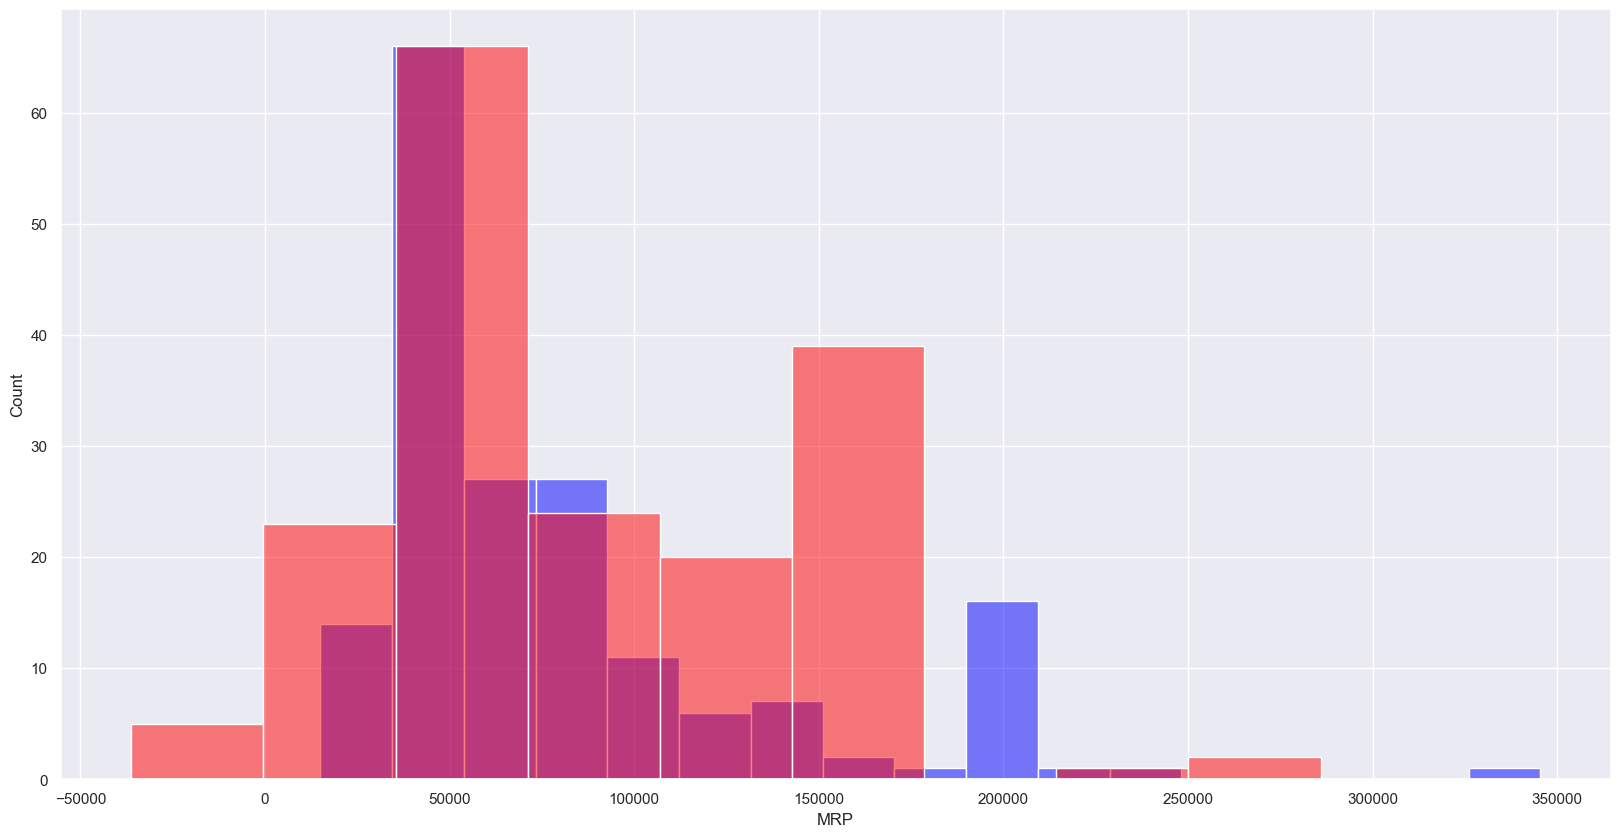

In [841]:
y_test_pred = regressor.predict(X_test_transformed)

sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

## Decision Tree Regression

In [843]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor()
tree.fit(X_train_transformed, y_train)


DecisionTreeRegressor()

Mean Absolute Error:  13543.530522490631


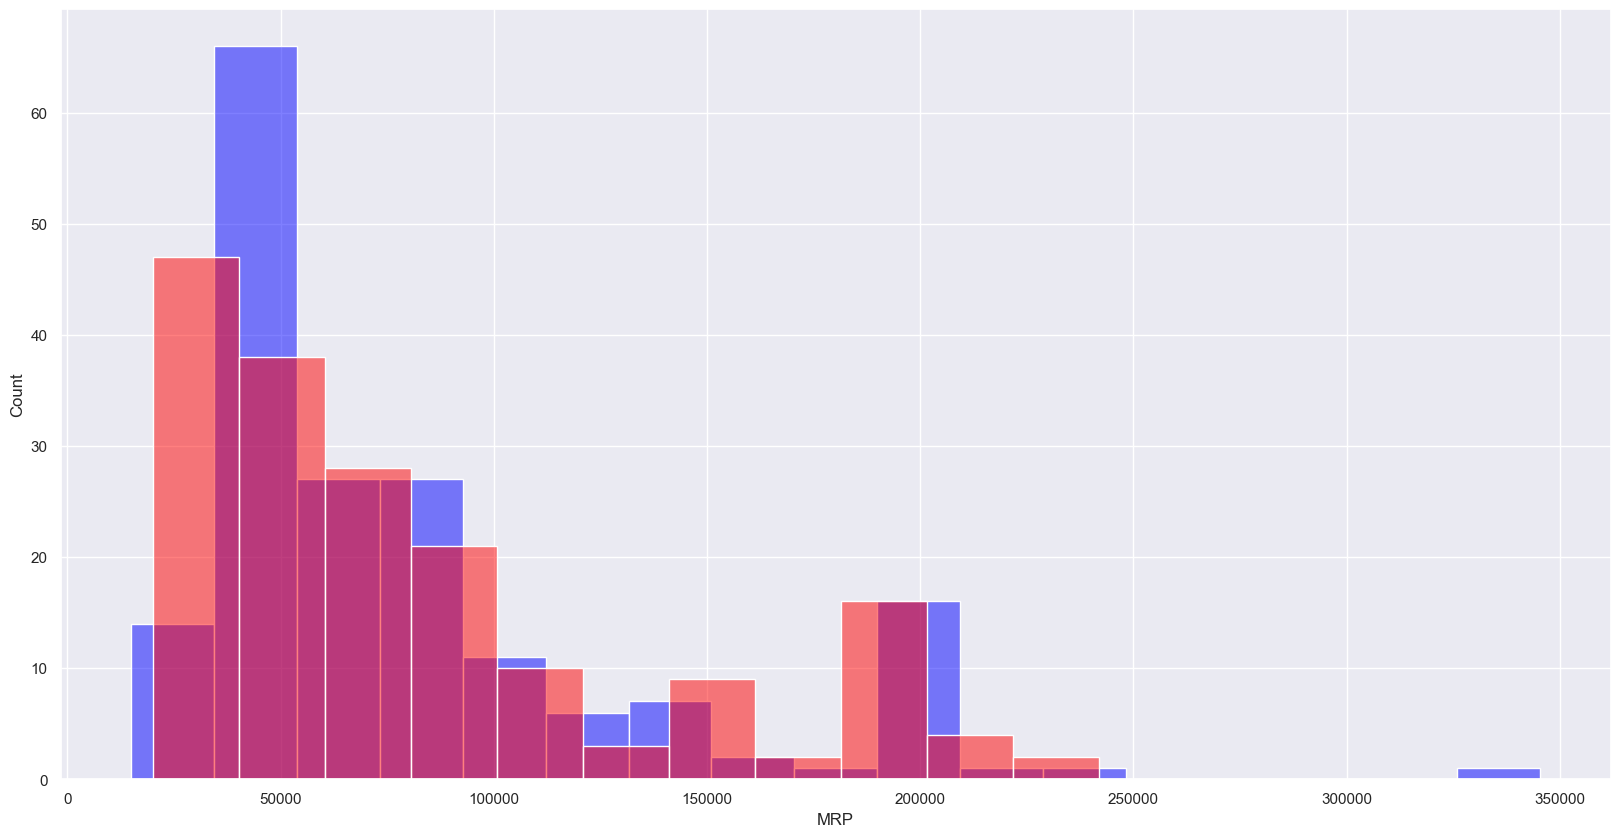

In [844]:
y_test_pred = tree.predict(X_test_transformed)

sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))